In [29]:
import tables as tb
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt

from histogram_functions import *

to_df = pd.DataFrame.from_records

In [30]:
run = 6971
trigger="trigger1"

icversion_file  = f"/home/jrenner/analysis/{run}/hdf5/1sipm_3/ntuple_v099/{trigger}/"         + f"ntuple_combined_{run}.h5" 
testprod_file   = f"/home/jrenner/analysis/{run}/hdf5/1sipm_3/ntuple_IC-testprod/{trigger}/"  + f"ntuple_combined_{run}.h5"
testprod_p_file = f"/home/jrenner/analysis/{run}/hdf5/1sipm_3/ntuple_IC-testprod-p/{trigger}/"+ f"ntuple_combined_{run}.h5"

In [31]:
icversion_file  = tb.open_file(icversion_file)
testprod_file   = tb.open_file(testprod_file)
testprod_p_file = tb.open_file(testprod_p_file)

icversion_data  = to_df( icversion_file .root.PAOLINA.Summary.read() )
testprod_data   = to_df( testprod_file  .root.PAOLINA.Summary.read() )
testprod_p_data = to_df( testprod_p_file.root.PAOLINA.Summary.read() )

In [32]:
icversion_data.keys()

Index(['event', 'time', 'S1e', 'S1t', 'nS2', 'ntrks', 'nhits', 'S2e0', 'S2ec',
       'S2q0', 'S2qc', 'x_avg', 'y_avg', 'z_avg', 'r_avg', 'x_min', 'y_min',
       'z_min', 'r_min', 'x_max', 'y_max', 'z_max', 'r_max'],
      dtype='object')

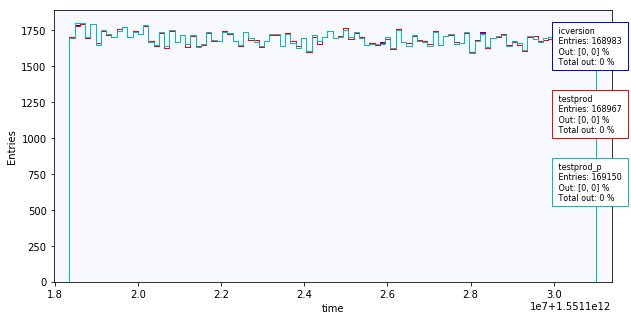

In [33]:
key="time"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=100)

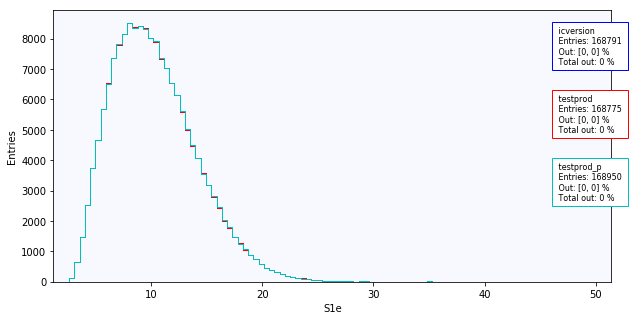

In [34]:
key="S1e"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=100,
        xlims=[None, 50])

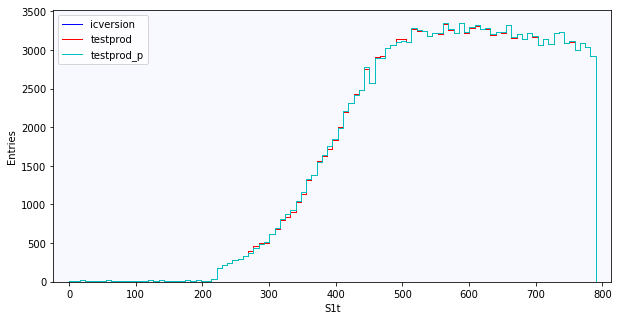

In [35]:
key="S1t"
histo1D(icversion_data [key].values*10**-3,
        testprod_data  [key].values*10**-3,
        testprod_p_data[key].values*10**-3,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=100,
        xlims=[None, None],
        Bbox=False)

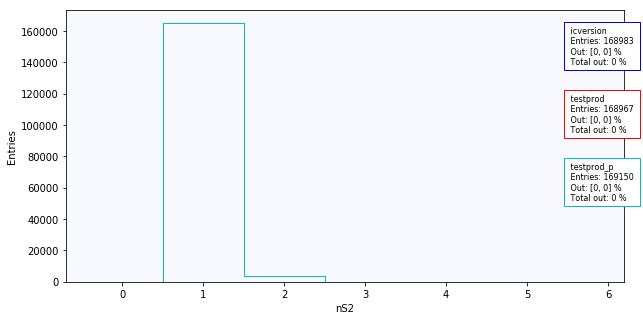

In [36]:
key="nS2"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=np.arange(-0.5, 6),
        xlims=[-0.5, 6])

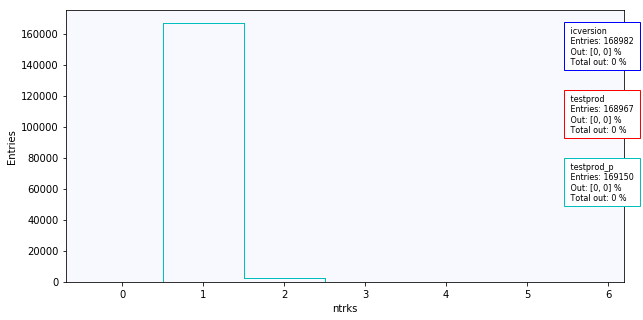

In [37]:
key="ntrks"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=np.arange(-0.5, 6),
        xlims=[-0.5, 6])

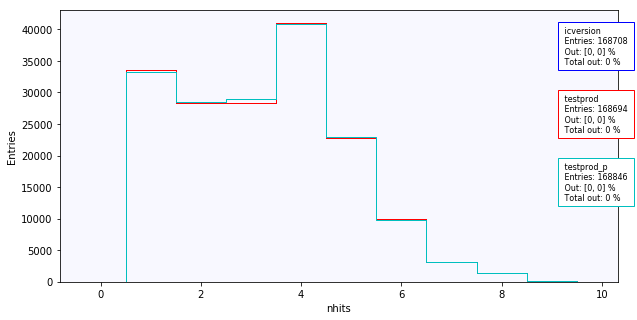

In [38]:
key="nhits"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=np.arange(-0.5, 10),
        xlims=[-0.5, 10])

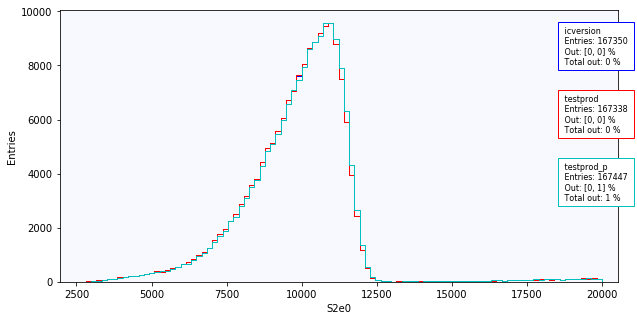

In [39]:
key="S2e0"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=100,
        xlims=[None, 2e4])

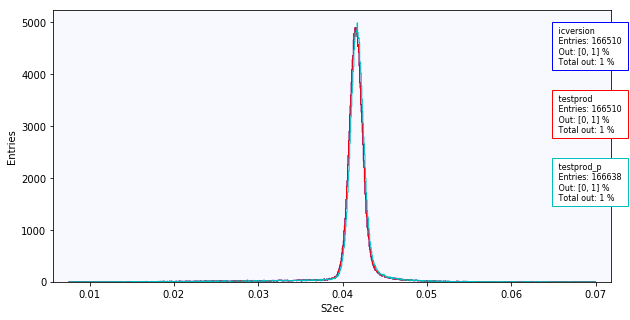

In [40]:
key="S2ec"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=1000,
        xlims=[None, 0.07])

In [41]:
def F(E, Eph, sig):
    return (1/((2*np.pi)**0.5*sig)) * np.e**(-(E-Eph)**2/(2*sig**2))

def chisq(F, popt, xdata, ydata):
    return np.sum((F(xdata, *popt)-ydata)**2/((len(xdata)-len(popt))*ydata))

import scipy.optimize as optimize

a, b = 0.035, 0.05
E = icversion_data["S2ec"].values
E = E[(a<E)&(E<b)]

ydata, xdata = np.histogram(E, bins=100)
xdata = (xdata[:-1] + xdata[1:]) /2.

guess = [np.mean(E), np.std(E)]
popt, pcov = optimize.curve_fit(F, xdata, ydata, p0 = guess, sigma = np.sqrt(ydata),
                               bounds=([-np.inf, 0], np.inf))
Eph, sig = popt[0], popt[1]

Energy (keV) 41.60549815614056
R(%) 4.686035010706321


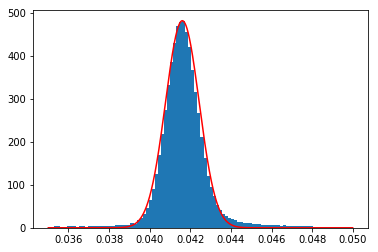

In [42]:
plt.plot( np.sort(E) , F(np.sort(E), Eph, sig), c="red")
plt.hist(E, bins=100, density=True)

print("Energy (keV)", Eph*1000)
print("R(%)", 2.355*sig*100/Eph)

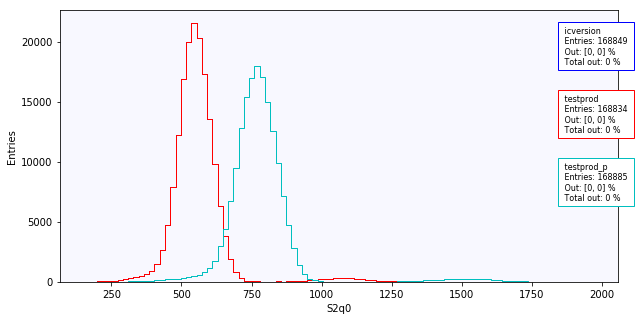

In [43]:
key="S2q0"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=100,
        xlims=[None, 2e3])

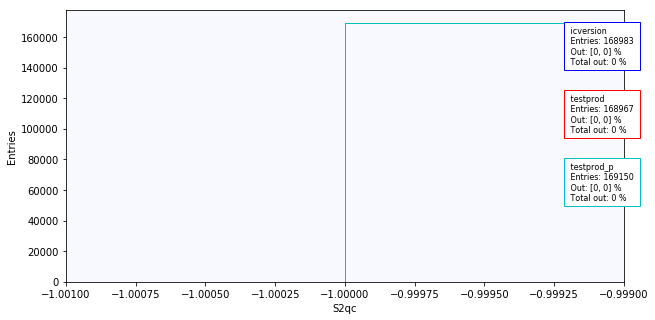

In [44]:
key="S2qc"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=100,
        xlims=[None, None])

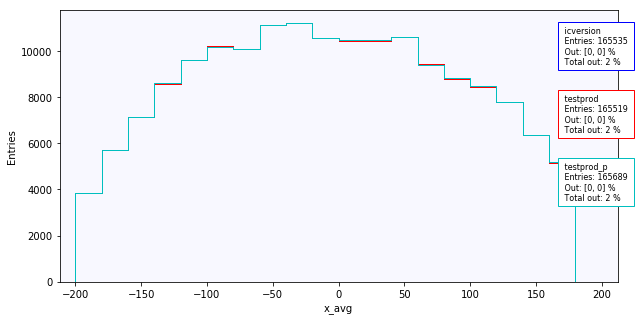

In [45]:
key="x_avg"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=np.arange(-200, 200, 20),
        xlims=[-200, 200])

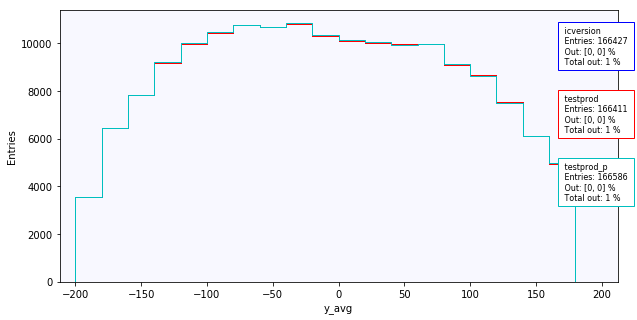

In [46]:
key="y_avg"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=np.arange(-200, 200, 20),
        xlims=[-200, 200])

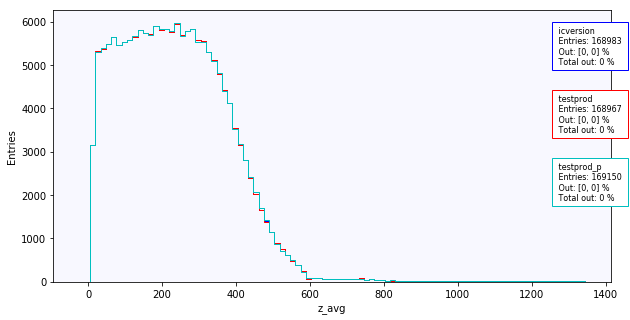

In [47]:
key="z_avg"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=100)

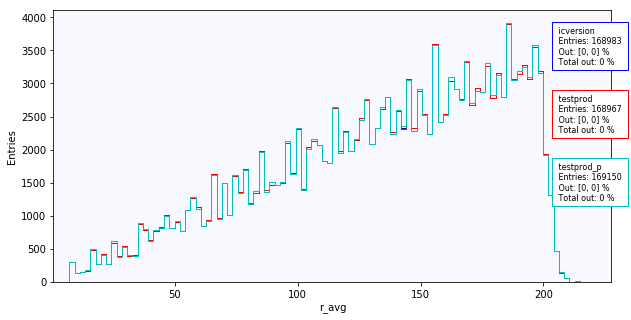

In [48]:
key="r_avg"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=100)

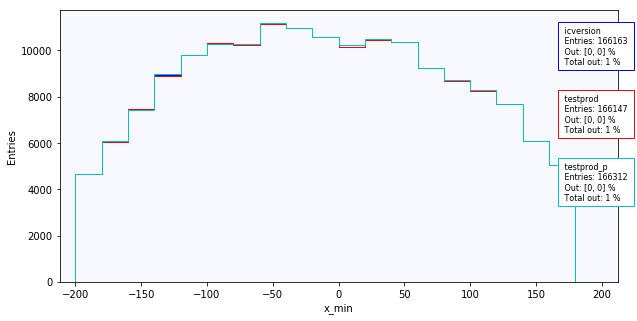

In [49]:
key="x_min"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=np.arange(-200, 200, 20),
        xlims=[-200, 200])

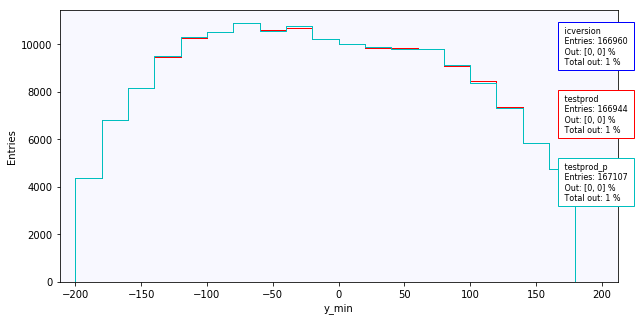

In [50]:
key="y_min"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=np.arange(-200, 200, 20),
        xlims=[-200, 200])

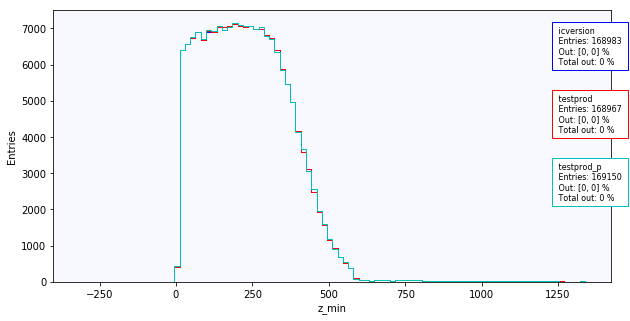

In [51]:
key="z_min"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=100)

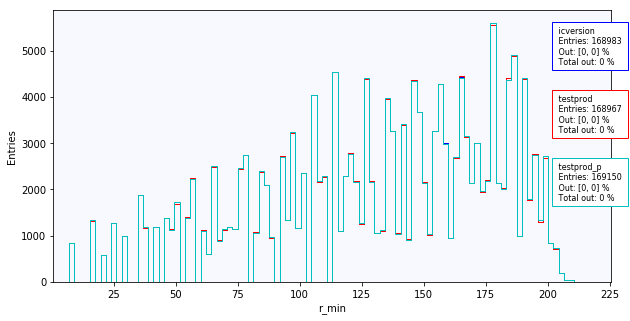

In [52]:
key="r_min"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=100)

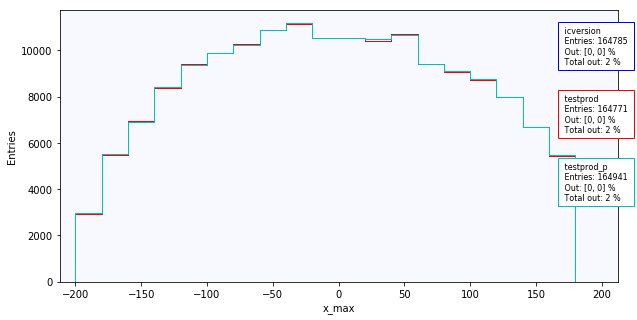

In [53]:
key="x_max"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=np.arange(-200, 200, 20),
        xlims=[-200, 200])

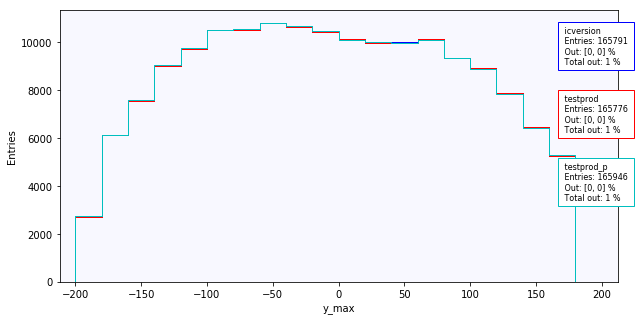

In [54]:
key="y_max"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=np.arange(-200, 200, 20),
        xlims=[-200, 200])

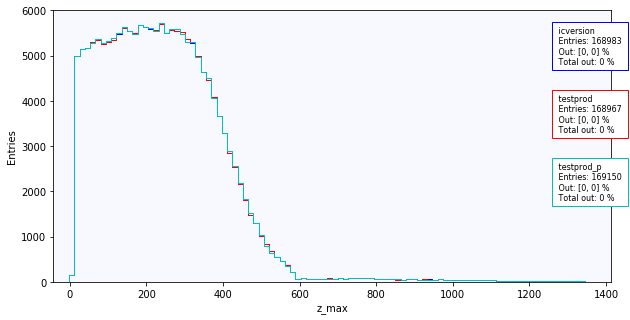

In [55]:
key="z_max"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=100)

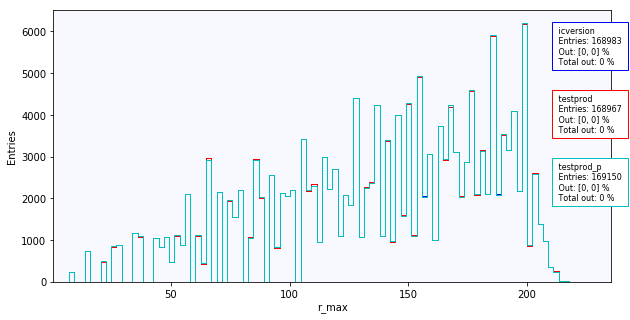

In [56]:
key="r_max"
histo1D(icversion_data [key].values,
        testprod_data  [key].values,
        testprod_p_data[key].values,
        xlabel=f"{key}",
        Label0="icversion",
        Label1="testprod",
        Label2="testprod_p",
        bins=100)